#### We import the required library

In [94]:
#log add data preprocessing and remove dropout for testing
#Load necessary library
import numpy as np
from scipy import misc
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import h5py
import time
#number of sample
n=100
# import cv2

In [93]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


#### Read data from pickle file

In [95]:
#Read data from pickle file
import six.moves.cPickle as pickle
import os
import sys
import gzip
data_dir = 'C:\\Users\\Mert Ketenci\\Desktop\\train\\train\\'
data_dir=os.getcwd()
output_file = 'trainpkl.gz'
out_path = os.path.join("C:\\Users\\Mert Ketenci\\Desktop\\train\\train\\", output_file)
f_test = gzip.open(out_path, 'rb')
test_set = pickle.load(f_test)
f_test.close()
# print (test_set)

#### Define the pictures in an array 

In [97]:
#Create labels and length list
label=[]
label = [int(x) for x in test_set["labels"]]
label = np.asarray(label)
Pic_crop_Final =  test_set["images"]

#### Substract the mean of the image and define training-validation sets for the model

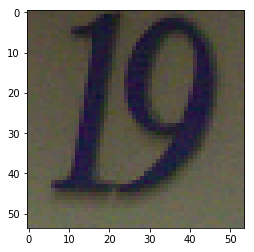

In [98]:
n_train=1000
n_train = int(n*0.8)
Pic_crop_Final = test_set["images"]
plt.imshow(Pic_crop_Final[0].reshape([54,54,3]))
x_train = np.array(Pic_crop_Final[:n_train])
x_val = np.array(Pic_crop_Final[n_train:n])
x_train = np.array(Pic_crop_Final[:n_train])
x_val = np.array(Pic_crop_Final[n_train:n])
y_train = label[:n_train]
y_val = label[n_train:n]
max_image = np.max(x_train, axis=0)
min_image = np.min(x_train, axis=0)
x_train = (x_train.astype(np.float32) - max_image)/(max_image-min_image)
x_val = (x_val.astype(np.float32) - max_image)/(max_image-min_image)
x_train = x_train.reshape(-1,54,54,3)
x_val = x_val.reshape(-1,54,54,3)
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)

#### The model definition:

In [99]:
def model (x, y, is_training=True, drop_rate=0.8):
    if is_training == False:
        drop_rate=0


    with tf.variable_scope('CNN_1'):
        conv = tf.layers.conv2d(x, filters=48, kernel_size=[5, 5], padding='same')
        norm = tf.layers.batch_normalization(conv)
        activation = tf.nn.relu(norm)
        pool = tf.layers.max_pooling2d(activation, pool_size=[2, 2], strides=2, padding='same')
        hidden1 = pool  # 27 * 27 * 48
        # print(hidden1.shape)

    with tf.variable_scope('CNN_2'):
        conv = tf.layers.conv2d(hidden1, filters=64, kernel_size=[5, 5], padding='same')
        norm = tf.layers.batch_normalization(conv)
        activation = tf.nn.relu(norm)
        pool = tf.layers.max_pooling2d(activation, pool_size=[2, 2], strides=1, padding='same')
        hidden2 = pool  # 27 * 27 * 64
        # print(hidden2.shape)

    with tf.variable_scope('CNN_3'):
        conv = tf.layers.conv2d(hidden2, filters=128, kernel_size=[5, 5], padding='same')
        norm = tf.layers.batch_normalization(conv)
        activation = tf.nn.relu(norm)
        pool = tf.layers.max_pooling2d(activation, pool_size=[2, 2], strides=2, padding='same')
        hidden3 = pool  # 14 * 14 * 128
        # print(hidden3.shape)

    with tf.variable_scope('CNN_4'):
        conv = tf.layers.conv2d(hidden3, filters=160, kernel_size=[5, 5], padding='same')
        norm = tf.layers.batch_normalization(conv)
        activation = tf.nn.relu(norm)
        pool = tf.layers.max_pooling2d(activation, pool_size=[2, 2], strides=1, padding='same')
        hidden4 = pool  # 14 * 14 *160
        # print(hidden4.shape)

    with tf.variable_scope('CNN_5'):
        conv = tf.layers.conv2d(hidden4, filters=192, kernel_size=[5, 5], padding='same')
        norm = tf.layers.batch_normalization(conv)
        activation = tf.nn.relu(norm)
        pool = tf.layers.max_pooling2d(activation, pool_size=[2, 2], strides=2, padding='same')
        hidden5 = pool  # 7 * 7 * 192
        # print(hidden5.shape)

    with tf.variable_scope('CNN_6'):
        conv = tf.layers.conv2d(hidden5, filters=192, kernel_size=[5, 5], padding='same')
        norm = tf.layers.batch_normalization(conv)
        activation = tf.nn.relu(norm)
        pool = tf.layers.max_pooling2d(activation, pool_size=[2, 2], strides=1, padding='same')
        hidden6 = pool  # 7 * 7 * 192
        # print(hidden6.shape)

    with tf.variable_scope('CNN_7'):
        conv = tf.layers.conv2d(hidden6, filters=192, kernel_size=[5, 5], padding='same')
        norm = tf.layers.batch_normalization(conv)
        activation = tf.nn.relu(norm)
        pool = tf.layers.max_pooling2d(activation, pool_size=[2, 2], strides=2, padding='same')
        hidden7 = pool  # 4 * 4 * 192
        # print(hidden7.shape)

    with tf.variable_scope('CNN_8'):
        conv = tf.layers.conv2d(hidden7, filters=192, kernel_size=[5, 5], padding='same')
        norm = tf.layers.batch_normalization(conv)
        activation = tf.nn.relu(norm)
        pool = tf.layers.max_pooling2d(activation, pool_size=[2, 2], strides=1, padding='same')
        hidden8 = pool  # 4 * 4 * 192

    flatten = tf.reshape(hidden8, [-1, 4 * 4 * 192])

    with tf.variable_scope('Hidden_1'):
        dense = tf.layers.dense(flatten, units=8, activation=tf.nn.sigmoid)
        dropout = tf.layers.dropout(dense, rate=drop_rate)
        hidden9 = dropout

    with tf.variable_scope('Hidedn_2'):
        dense = tf.layers.dense(hidden9, units=8, activation=tf.nn.sigmoid)
        dropout = tf.layers.dropout(dense, rate=drop_rate)
        hidden10 = dropout

    with tf.variable_scope('Output_layer'):
        pred = tf.layers.dense(hidden10, units=1, activation=tf.nn.relu)
    
    loss  = tf.reduce_sum(tf.square(pred - y), name = 'loss_value')/100000

    return loss,pred

##### Train the model:

In [104]:
tf.reset_default_graph()
with tf.name_scope('inputs'):
    x = tf.placeholder(tf.float32, shape=(None,54,54,3))
    y =  tf.placeholder(tf.float32, shape=(None,))
    is_training = tf.placeholder(tf.bool, name='is_training')
num_train = x_train.shape[0]
batch_size = 8
epoches = 100
num_batch = num_train//batch_size
loss, pred = model(x, y)
iter_total=0
train_step = tf.train.GradientDescentOptimizer(1e-13).minimize(loss)

cur_model_name = 'SVHN_{}'.format(int(time.time()))
with tf.Session() as sess:

    sess.run(tf.initialize_all_variables())
    saver = tf.train.Saver()
    for e in range(epoches):
        print("epoch {} ".format(e + 1))
        for i in range(num_batch):
            iter_total += 1
            choice=np.random.choice(num_train, size=batch_size, replace=False)
            batch_x, batch_y = x_train[choice], y_train[choice]
            _, loss_tf = sess.run([train_step, loss],feed_dict={x:batch_x ,y:batch_y, is_training: True})
            pred_tf = sess.run([pred],feed_dict={x:x_train, is_training: False})

            if iter_total % 10 == 0:
                pred_tf=np.asarray(pred_tf).astype(int)
                diff=y_train.reshape(y_train.shape[0],1)-pred_tf.reshape(pred_tf.shape[1],1)
                valid_acc = 1  - np.count_nonzero(diff)/diff.shape[0]

                print('{} batch training loss: {}'.format(i,loss_tf))
                print('{} batch training loss: {} validation accuracy : {}%'.format(i,loss_tf,valid_acc))

                saver.save(sess, 'model/{}'.format(cur_model_name))


epoch 1 
9 batch training loss: 52.36391830444336
9 batch training loss: 52.36391830444336 validation accuracy : 0.0%
epoch 2 
9 batch training loss: 54.85063934326172
9 batch training loss: 54.85063934326172 validation accuracy : 0.0%
epoch 3 
9 batch training loss: 45.296077728271484
9 batch training loss: 45.296077728271484 validation accuracy : 0.0%
epoch 4 
9 batch training loss: 457.4124755859375
9 batch training loss: 457.4124755859375 validation accuracy : 0.0%
epoch 5 
9 batch training loss: 2.0442399978637695
9 batch training loss: 2.0442399978637695 validation accuracy : 0.0%
epoch 6 
9 batch training loss: 1.5999999046325684
9 batch training loss: 1.5999999046325684 validation accuracy : 0.0%
epoch 7 
9 batch training loss: 8.333919525146484
9 batch training loss: 8.333919525146484 validation accuracy : 0.0%
epoch 8 
9 batch training loss: 104.27399444580078
9 batch training loss: 104.27399444580078 validation accuracy : 0.0%
epoch 9 
9 batch training loss: 461.291748046875

9 batch training loss: 47.45471954345703
9 batch training loss: 47.45471954345703 validation accuracy : 0.0%
epoch 71 
9 batch training loss: 1.3865599632263184
9 batch training loss: 1.3865599632263184 validation accuracy : 0.0%
epoch 72 
9 batch training loss: 158.5968780517578
9 batch training loss: 158.5968780517578 validation accuracy : 0.0%
epoch 73 
9 batch training loss: 12.568239212036133
9 batch training loss: 12.568239212036133 validation accuracy : 0.0%
epoch 74 
9 batch training loss: 0.6590399742126465
9 batch training loss: 0.6590399742126465 validation accuracy : 0.0%
epoch 75 
9 batch training loss: 137.75360107421875
9 batch training loss: 137.75360107421875 validation accuracy : 0.0%
epoch 76 
9 batch training loss: 55.76839828491211
9 batch training loss: 55.76839828491211 validation accuracy : 0.0%
epoch 77 
9 batch training loss: 3.1284799575805664
9 batch training loss: 3.1284799575805664 validation accuracy : 0.0%
epoch 78 
9 batch training loss: 3.9896798133850

#### For this model, we observed an unstable loss function. Eventhough we used a very small learning rate for the Adam optimizer loss function continued to flactuate. To avoid this, we even tried to use an activation function that provided vanishing gradient (sigmoid) but could not overcome the oscilation. For sigmoid unction we especially used a different way of input normalization. That is (input-max)/(max-min).